# Intro to scikit learn(sklearn)

Topics_to_cover = ["0:- An end to end scikit learn workflow" ,
"1:- Getting the data ready" ,
"2:- Choose the estimator/algo" ,
"3:- Fit the model/algo and make prediction" ,
"4:-Evaluate the model" ,
"5:- Improve the model" ,
"6:- Save and load the trained the model"]

# standard imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data ready to be used for machinelearning
 Three things to do :-
        1Split the data into features and labels( usually as X and Y)
        2Filling or disregarding filling values
        3.Converting non-mumerical values to numerical values (also called feature encoding)

In [5]:
heart_disease.head()

NameError: name 'heart' is not defined

In [13]:
heart_disease= pd.read_csv("data/original.csv")

In [14]:
X = heart_disease.drop("target",axis=1)

In [15]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
Y = heart_disease["target"]

In [17]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
# split into training an test set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, Y,test_size=0.2)

In [20]:
X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [21]:
X.shape

(303, 13)

In [22]:
## its all numerical

In [23]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
#split the data

In [27]:
X= car_sales.drop("Price",axis = 1)
Y = car_sales["Price"]

#Split into training and test

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [28]:
#build machinelearning model 
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'BMW'

In [29]:
# turn into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_feature)],remainder="passthrough")

Transformed_X = transformer.fit_transform(X)
Transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(Transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
dummies= pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
#refit the model
np.random.seed(42)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(Transformed_X,Y,test_size=0.2)
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
model.score(X_test,Y_test)

0.3235867221569877

## Missing value

In [36]:
# Fill them with some value
# Remove the missing rows

In [37]:
car_sales_missing =pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
## Convert them into numbers

In [40]:
# create X and Y
X =car_sales_missing.drop("Price",axis=1)
Y = car_sales["Price"]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
categorical_feature =["Make","Colour","Doors"]
Transformer = ColumnTransformer([("one_hot",one_hot,categorical_feature)],remainder="passthrough")

Transformed_X = Transformer.fit_transform(X)
Transformed_X.head()

ValueError: Input contains NaN

In [42]:
##Fill missing data with panda

In [43]:
car_sales_missing["Make"].fillna("missing",inplace = True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [44]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
### remove rows with missing price value

In [46]:
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
# create X and Y
X =car_sales_missing.drop("Price",axis=1)
Y = car_sales["Price"]

In [49]:
##from sklearn.model_selection import train_test_split
###X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.5)

##from sklearn.ensemble import RandomForestRegressor##

##model=RandomForestRegressor()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
categorical_feature =["Make","Colour","Doors"]
Transformer = ColumnTransformer([("one_hot",one_hot,categorical_feature)],remainder="passthrough")

Transformed_X = Transformer.fit_transform(car_sales_missing)
Transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [50]:
##fill missing valuesss

In [51]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [54]:
X=car_sales_missing.drop("Price",axis=1)
Y=car_sales_missing["Price"]
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [55]:
##fill missing values with Scikit Learn

In [56]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill catergorical values with Missing and Numerical value with Mean
cat_imputer = SimpleImputer(strategy = "constant",fill_value="missing")
door_imputer =SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")


#create the feature
cat_feature=["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]

#CREATEANIMPUTER
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_feature),
                            ("door_imputer",door_imputer,door_feature),
                            ("num_imputer",num_imputer,num_feature)])

##transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [57]:
car_filled_X = pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Odometer (KM)'])
car_filled_X.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [58]:
car_filled_X.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
categorical_feature =["Make","Colour","Doors"]
Transformer = ColumnTransformer([("one_hot",one_hot,categorical_feature)],remainder="passthrough")

Transformed_X = Transformer.fit_transform(car_filled_X)
Transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [60]:
#we have got our datafilled and converted iinto numbers
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(Transformed_X,Y,test_size=0.5)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.2138654762783696

## 2. Choose the right estimator/algorithm for our problem for our problem

## Scikit-learn uses estimator as another term machine learning model or algorithm

### Classification - predicting whether one thing is this or another
### regression - predicting a number

### 2.1 picking amachine learning model for a regression problem

In [61]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [62]:
boston_df = pd.DataFrame(boston["data"],columns = boston ["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [63]:
# how many samples
len(boston_df)

506

In [64]:
##letstry Ridge regression model

from sklearn.linear_model import Ridge

#set random seed
np.random.seed(42)

##create the data

X = boston_df.drop("target",axis=1)
Y= boston_df["target"]

#splitinto train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

##instantiate ridge model

model=Ridge()
model.fit(X_train,Y_train)

##checkthe scoreof ridge model on test data
model.score(X_test,Y_test)

0.6662221670168522

In [65]:
##lets try random forest

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X= boston_df.drop("target",axis=1)
Y= boston_df["target"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.873969014117403

### Choosing an estimator for a classification problem

In [66]:
heart_disease = pd.read_csv("data/original.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

In [68]:
## try LinearSVC

from sklearn.svm import LinearSVC

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

clf = LinearSVC(max_iter=1000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)



C:\Users\A1003354\Desktop\SAMPLE_PROJECT\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.4918032786885246

In [69]:
## try random forest classifier for better performance

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)



0.8524590163934426

# If you have structured data use ensemble methods for better performance
# if you have unstructured data ,use deep  learning or transfer learning

# SECTION 3  Fit the model/algo  on our data and use it to make predictions


# 3.1 FITTING THE MODEL TO THE DATA

In [70]:
## import the randomforestclassifier class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8524590163934426

# 3.2 MAKE PREDICTIONS USING A MACHINE LEARNING MODEL

2 WAYS TO MAKE PREDICTIONS
1. predict()
2. predict_proba()

In [71]:
# USE A TRAINED MDOEL TO MAKE PREDICTIONS

In [72]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [75]:
## Evaluating a model for Regressor and Classification model
#Classification :- mean accuracy
#Regressor :- coefficient of determination

In [76]:
# 4 Evaluating a model

# 4.1 score method

In [77]:
# 4.2 scoring parameter

In [78]:
from sklearn.model_selection import cross_val_score

## import the randomforestclassifier class
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,Y_train)
clf.score(X_test,Y_test);

In [79]:
clf.score(X_test,Y_test)

0.8524590163934426

In [80]:
cross_val_score(clf,X,Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [81]:
np.random.seed(42)

clf_single_score = clf.score(X_test,Y_test)

clf_mean_score = np.mean(cross_val_score(clf,X,Y))

clf_single_score,clf_mean_score

(0.8524590163934426, 0.8248087431693989)

In [82]:
# 4.2 scoring parameter was set to none

cross_val_score(clf,X,Y,cv=5,scoring= None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# 4.2.1CLASSIFICATION MODEL EVALUATION METRICS

1.ACCURACY
2 AREA UNDER THE ROC CURVE
3 CONFUSION MATRIX
4 CLASSIFICATION REPORT

In [83]:
# 1 accuracy
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
Y= heart_disease["target"]

clf=RandomForestClassifier()

clf.fit(X_train,Y_train)
cross_val_score = cross_val_score(clf,X,Y,cv=5)

In [84]:
np.mean(cross_val_score)

0.8214754098360656

## 2 area under the reciever operating characteristics curve(AUC,ROC)

AREA UNDER CURVE,

ROC CURVE

In [85]:
from sklearn.metrics import roc_curve

##Fit the classifier

clf.fit(X_train,Y_train)

Y_probs = clf.predict_proba(X_test)
Y_probs[:10],len(Y_probs)

Y_probs_positive= Y_probs[:,1]
Y_probs_positive

array([0.1 , 0.5 , 0.62, 0.08, 0.73, 0.88, 0.57, 0.06, 0.03, 0.44, 0.78,
       0.3 , 0.95, 0.16, 0.96, 0.98, 1.  , 0.06, 0.04, 0.05, 0.52, 0.1 ,
       0.7 , 0.74, 0.67, 0.78, 0.75, 0.82, 0.1 , 0.82, 0.08, 0.13, 0.03,
       0.31, 0.61, 0.14, 0.57, 0.75, 0.68, 0.89, 0.78, 0.74, 0.86, 0.74,
       0.83, 0.32, 0.54, 0.98, 0.11, 0.05, 0.19, 0.19, 0.81, 0.68, 0.21,
       0.07, 0.31, 0.98, 0.13, 0.01, 0.16])

In [86]:
fpr,tpr,threshold =  roc_curve(Y_test,Y_probs_positive)

In [87]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.24137931,
       0.24137931, 0.27586207, 0.4137931 , 0.44827586, 0.51724138,
       0.55172414, 0.65517241, 0.68965517, 0.72413793, 0.86206897,
       0.89655172, 0.96551724, 1.        ])

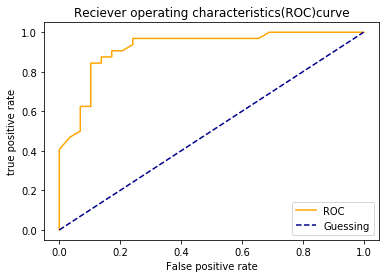

In [91]:
# CREATE a function  for plotting ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    
    
    #PLOT roc curve
    
    plt.plot(fpr,tpr,color="orange",label ="ROC")
    
    # PLOT LINE with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle ="--",label="Guessing")
    
    #customizing the plot
    plt.xlabel("False positive rate")
    plt.ylabel("true positive rate")
    plt.title ("Reciever operating characteristics(ROC)curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,Y_probs_positive)

0.9207974137931034

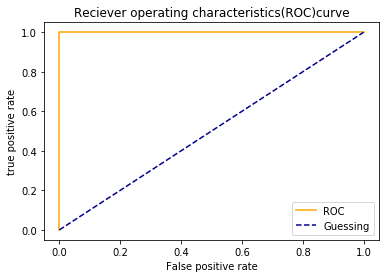

In [95]:
# plot perfet ROC curve nd AUC score

fpr,tpr,thresholds=roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [96]:
roc_auc_score(Y_test,Y_test)

1.0

##***confusion matrix***##

A confusion matrix is aquik way to compare the labels a model prdict and the actual labels  it was supposed to predict.
The idea where the model is getting confused.

In [99]:
from sklearn.metrics import confusion_matrix

Y_preds = clf.predict(X_test)

confusion_matrix(Y_test,Y_preds)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [100]:
## visualize confusion matrix with pd.crosstab()

pd.crosstab(Y_test,
           Y_preds,
           rownames=["Actual labels"],
           colnames=["Prediction labels"])

Prediction labels,0,1
Actual labels,,
0,25,4
1,4,28


In [109]:
## make our confusion matrix more visual with Seaborn's Heatmap()

## install a conda package into a jupyter notebook

In [107]:
import sys

!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\A1003354\Desktop\SAMPLE_PROJECT\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    certifi-2020.6.20          |           py38_0         157 KB
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:         445 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0

The following packages will be UPDATED:

  ca-certificates                                2020.1.1-0 --> 2020.6.24-0
  certifi                                 2020.4.5.1-py38_0 --> 2020.6.20-py38_0








==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




ca-certificates-2020 | 125 KB    |            |   0% 
ca-certificates-2020 | 125 KB    | #2         |  13% 
ca-certificates-2020 | 125 KB    | ########## | 100% 

certifi-2020.6.20    | 157 KB    |            |   0% 
certifi-2020.6.20    | 157 KB    | #          |  10% 
certifi-2020.6.20    | 157 KB    | ########## | 100% 

seaborn-0.10.1       | 163 KB    |            |   0% 
seaborn-0.10.1       | 163 KB    | #####8     |  59% 
seaborn-0.10.1       | 163 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


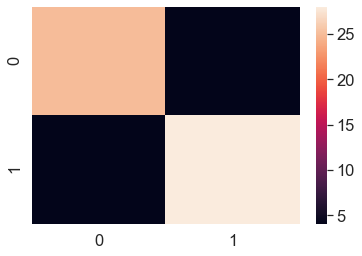

In [124]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat= confusion_matrix (Y_test,Y_preds)

sns.heatmap(conf_mat)

In [105]:
##seaborn is based on top of matplotlib :- will have to install seaborn

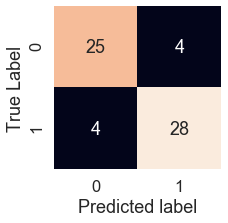

In [138]:
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat ,annot = True,cbar= False)
                         
    plt.xlabel("Predicted label")
    plt.ylabel("True Label");
                           
plot_conf_mat(conf_mat)

** classification report **

In [142]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [144]:
## where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0]= 1 # one is predicted as true

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict= True ))


C:\Users\A1003354\Desktop\SAMPLE_PROJECT\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
